In [1]:
!which python3

/opt/miniconda3/envs/dsi-env/bin/python3


# Exploratory Task

## Load Data

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from utils import load_voter_data_txt, clean_voter_data, plot_voter_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
voter_data_path = "./data/ncvoter_Statewide.txt"    # statewide
# voter_data_path = "./data/ncvoter53.txt"    # lee county

#voter_data = load_voter_data_txt(voter_data_path, delimiter='\t', encoding='ISO-8859-1')
voter_data = pd.read_pickle("./data/voter_data.pkl")
voter_data.head()

,county_id,county_desc,voter_reg_num,ncid,last_name,first_name,middle_name,name_suffix_lbl,status_cd,voter_status_desc,...,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,vtd_abbrv,vtd_desc
0,1,ALAMANCE,9005990,AA56273,AABEL,RUTH,EVELYN,NaN,R,REMOVED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ALAMANCE,9178574,AA201627,AARDEN,JONI,AUTUMN,NaN,R,REMOVED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,ALAMANCE,9205561,AA216996,AARMSTRONG,TIMOTHY,DUANE,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,PROSECUTORIAL DISTRICT 17,103,103
3,1,ALAMANCE,9048723,AA98377,AARON,CHRISTINA,CASTAGNA,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,PROSECUTORIAL DISTRICT 17,03S,03S
4,1,ALAMANCE,9019674,AA69747,AARON,CLAUDIA,HAYDEN,NaN,A,ACTIVE,...,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,PROSECUTORIAL DISTRICT 17,124,124


In [5]:
print(voter_data.columns)
voter_data.groupby('county_desc').size().reset_index(name='count')

Index(['county_id', 'county_desc', 'voter_reg_num', 'ncid', 'last_name',
       'first_name', 'middle_name', 'name_suffix_lbl', 'status_cd',
       'voter_status_desc', 'reason_cd', 'voter_status_reason_desc',
       'res_street_address', 'res_city_desc', 'state_cd', 'zip_code',
       'mail_addr1', 'mail_addr2', 'mail_addr3', 'mail_addr4', 'mail_city',
       'mail_state', 'mail_zipcode', 'full_phone_number', 'confidential_ind',
       'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code',
       'birth_year', 'age_at_year_end', 'birth_state', 'drivers_lic',
       'precinct_abbrv', 'precinct_desc', 'municipality_abbrv',
       'municipality_desc', 'ward_abbrv', 'ward_desc', 'cong_dist_abbrv',
       'super_court_abbrv', 'judic_dist_abbrv', 'nc_senate_abbrv',
       'nc_house_abbrv', 'county_commiss_abbrv', 'county_commiss_desc',
       'township_abbrv', 'township_desc', 'school_dist_abbrv',
       'school_dist_desc', 'fire_dist_abbrv', 'fire_dist_desc',
       'water_di

,county_desc,count
0,ALAMANCE,134050
1,ALEXANDER,29309
2,ALLEGHANY,9380
3,ANSON,18366
4,ASHE,23329
...,...,...
95,WAYNE,88101
96,WILKES,51057
97,WILSON,62553
98,YADKIN,28626


In [6]:
voter_data['voter_status_desc'].unique()

array(['REMOVED', 'ACTIVE', 'INACTIVE', 'DENIED', 'TEMPORARY'],
      dtype=object)

## Data Preprocessing

In [7]:
# Clean surname, race, ztacs, select columns, and dropna
county_data = clean_voter_data(voter_data, county_name='ALAMANCE')
county_data.head()

filtering by county_name...
selecting columns...
cleaning surname...
cleaning ztac...
cleaning race...
selecting and renaming columns...
removing invalid records...


,county_id,county_desc,voter_reg_num,surname,zip_code,ztacs,race_code,true_race,party_cd
2,1,ALAMANCE,9205561,AARMSTRONG,27302.0,27302,W,white,REP
3,1,ALAMANCE,9048723,AARON,27215.0,27215,W,white,UNA
4,1,ALAMANCE,9019674,AARON,27215.0,27215,W,white,UNA
5,1,ALAMANCE,9129589,AARON,27253.0,27253,W,white,DEM
7,1,ALAMANCE,9041748,AARON,27215.0,27215,W,white,UNA


In [8]:
county_data.to_pickle("./data/alamance_voter_data_cleaned.pkl")

## BISG

In [12]:
from models import BisgPredictor

bisg_predictor = BisgPredictor()
bisg_predictions = bisg_predictor.inference(data=county_data)
bisg_predictions.head()

/Users/letianyu/Documents/Courses/DATA2050/project-bisg/models.py:26: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['pred_race'] = df[RACE_COLS].idxmax(axis=1)


,county_id,county_desc,voter_reg_num,surname,zip_code,ztacs,race_code,true_race,party_cd,white,black,api,native,multiple,hispanic,pred_race
2,1,ALAMANCE,9205561,AARMSTRONG,27302.0,27302,W,white,REP,NaN,NaN,NaN,NaN,NaN,NaN,nan
3,1,ALAMANCE,9048723,AARON,27215.0,27215,W,white,UNA,0.656896,0.293515,0.002515,0.003172,0.016057,0.027844,white
4,1,ALAMANCE,9019674,AARON,27215.0,27215,W,white,UNA,0.676591,0.281660,0.005410,0.001953,0.015542,0.018845,white
5,1,ALAMANCE,9129589,AARON,27253.0,27253,W,white,DEM,0.676591,0.281660,0.005410,0.001953,0.015542,0.018845,white
7,1,ALAMANCE,9041748,AARON,27215.0,27215,W,white,UNA,0.676591,0.281660,0.005410,0.001953,0.015542,0.018845,white


['other', 'native', 'multiple', 'api', 'unknown', 'nan', 'black', 'white', 'hispanic']


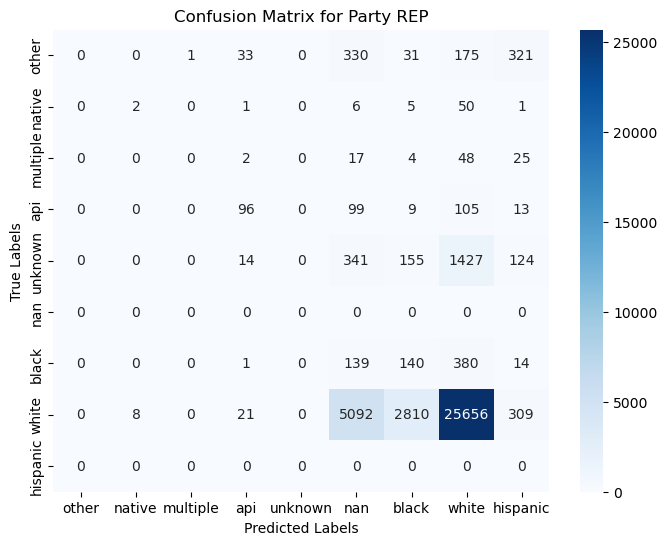

['other', 'native', 'multiple', 'api', 'unknown', 'nan', 'black', 'white', 'hispanic']


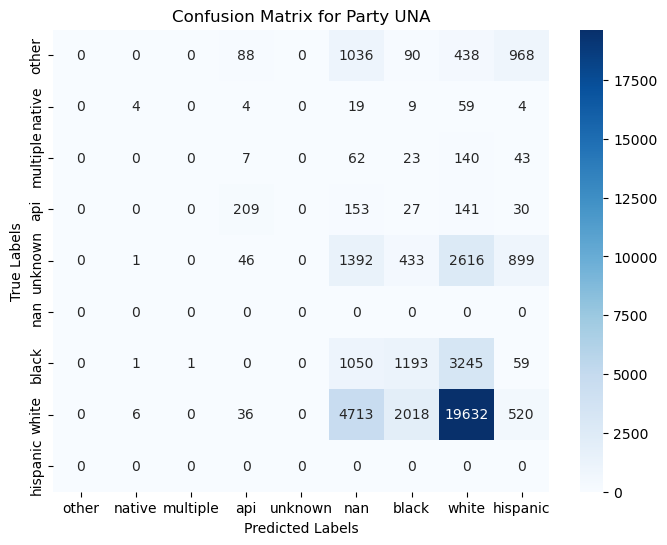

['other', 'native', 'multiple', 'api', 'unknown', 'nan', 'black', 'white', 'hispanic']


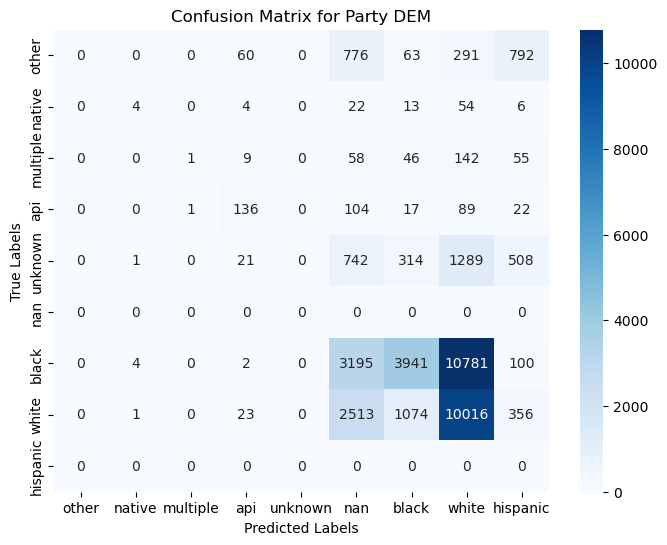

['other', 'multiple', 'api', 'unknown', 'nan', 'black', 'white', 'hispanic']


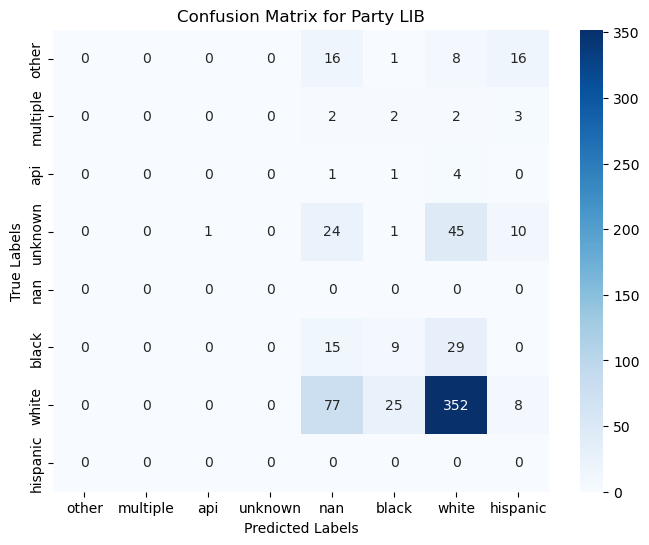

['other', 'native', 'multiple', 'api', 'unknown', 'nan', 'black', 'white', 'hispanic']


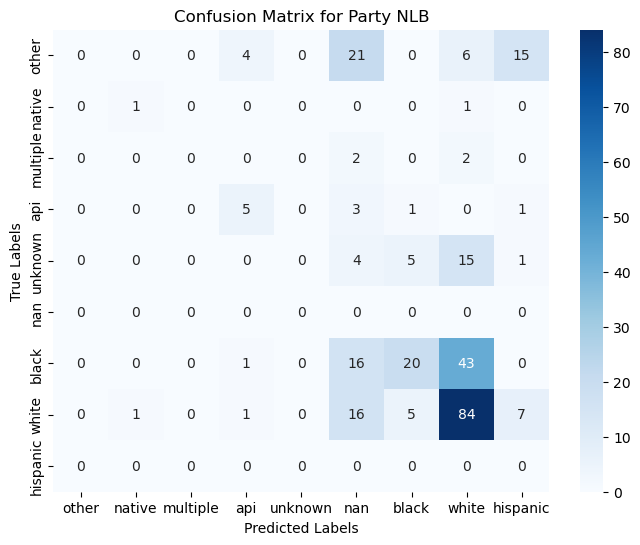

['other', 'unknown', 'nan', 'black', 'white']


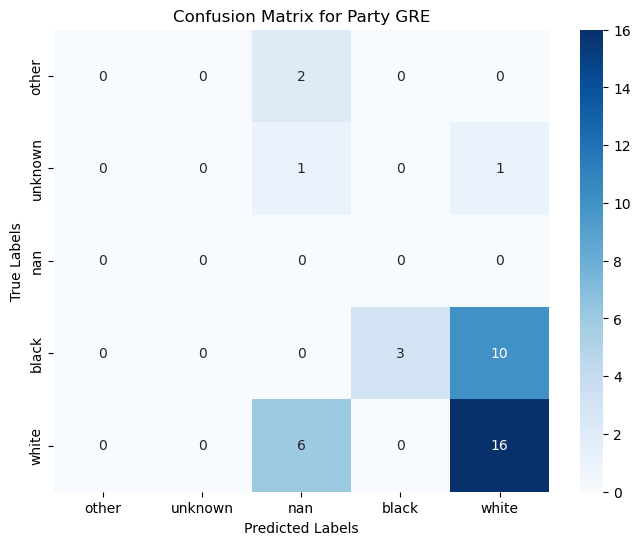

['other', 'unknown', 'nan', 'black', 'white']


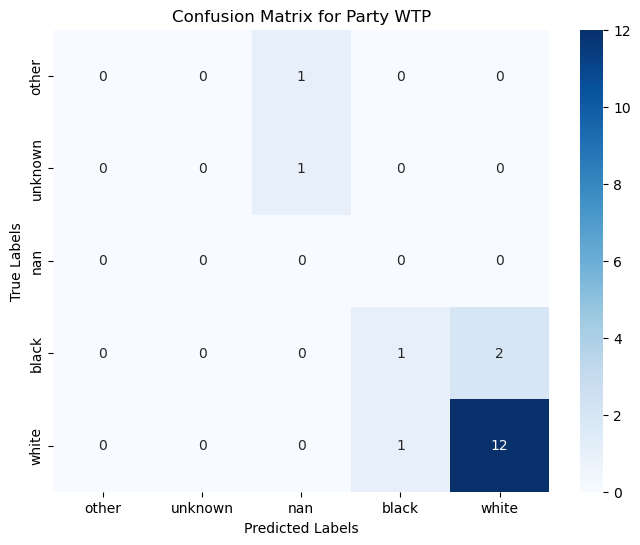

['other', 'api', 'nan', 'black', 'white']


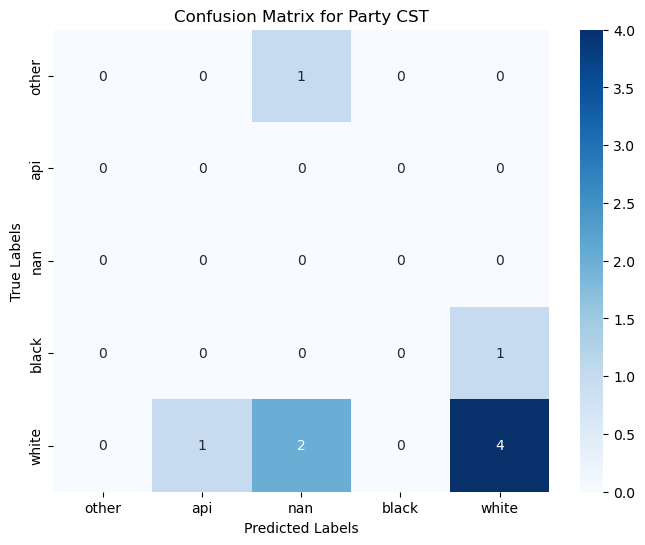

['other', 'unknown', 'nan', 'black', 'white', 'hispanic']


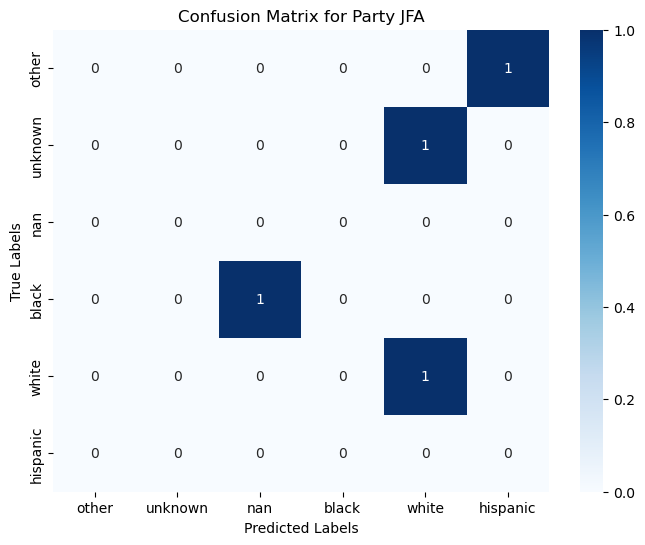

In [19]:
plot_voter_data(df=bisg_predictions)